In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"
!pip install -U ucimlrepo
!pip install -U seaborn==0.9.0


[notice] A new release of pip is available: 23.0 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from ucimlrepo import fetch_ucirepo
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# fetch dataset 
breastCancer = fetch_ucirepo(id=451) 

# data (as pandas dataframes) 
X = breastCancer.data.features 
y = breastCancer.data.targets

#get the data from the dataset
data = breastCancer.data.original

In [4]:
# variable information 
data.describe().round(2)# variable information 
data.describe().round(2)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.00,116.00,116.00,116.00,116.00,116.00,116.00,116.00,116.00,116.00
mean,57.30,27.58,97.79,10.01,2.69,26.62,10.18,14.73,534.65,1.55
std,16.11,5.02,22.53,10.07,3.64,19.18,6.84,12.39,345.91,0.50
min,24.00,18.37,60.00,2.43,0.47,4.31,1.66,3.21,45.84,1.00
25%,45.00,22.97,85.75,4.36,0.92,12.31,5.47,6.88,269.98,1.00
50%,56.00,27.66,92.00,5.92,1.38,20.27,8.35,10.83,471.32,2.00
75%,71.00,31.24,102.00,11.19,2.86,37.38,11.82,17.76,700.08,2.00
max,89.00,38.58,201.00,58.46,25.05,90.28,38.04,82.10,1698.44,2.00


In [5]:
#get statistics for the features
data.quantile([0.01, 0.25, 0.5, 0.75, 0.99])

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0.01,25.45,18.739398,70.00,2.55500,0.509623,4.749585,2.194280,3.273262,67.58200,1.0
0.25,45.00,22.973205,85.75,4.35925,0.917966,12.313675,5.474283,6.881763,269.97825,1.0
0.50,56.00,27.662416,92.00,5.92450,1.380939,20.271000,8.352692,10.827740,471.32250,2.0
0.75,71.00,31.241442,102.00,11.18925,2.857787,37.378300,11.815970,17.755207,700.08500,2.0
0.99,86.00,37.098310,198.55,50.32600,19.828925,88.401815,35.713500,54.983760,1698.44000,2.0


In [6]:
#check features for null values
X.isnull().sum()

Age            0
BMI            0
Glucose        0
Insulin        0
HOMA           0
Leptin         0
Adiponectin    0
Resistin       0
MCP.1          0
dtype: int64

In [7]:
#check target for null values
y.isnull().sum()

Classification    0
dtype: int64

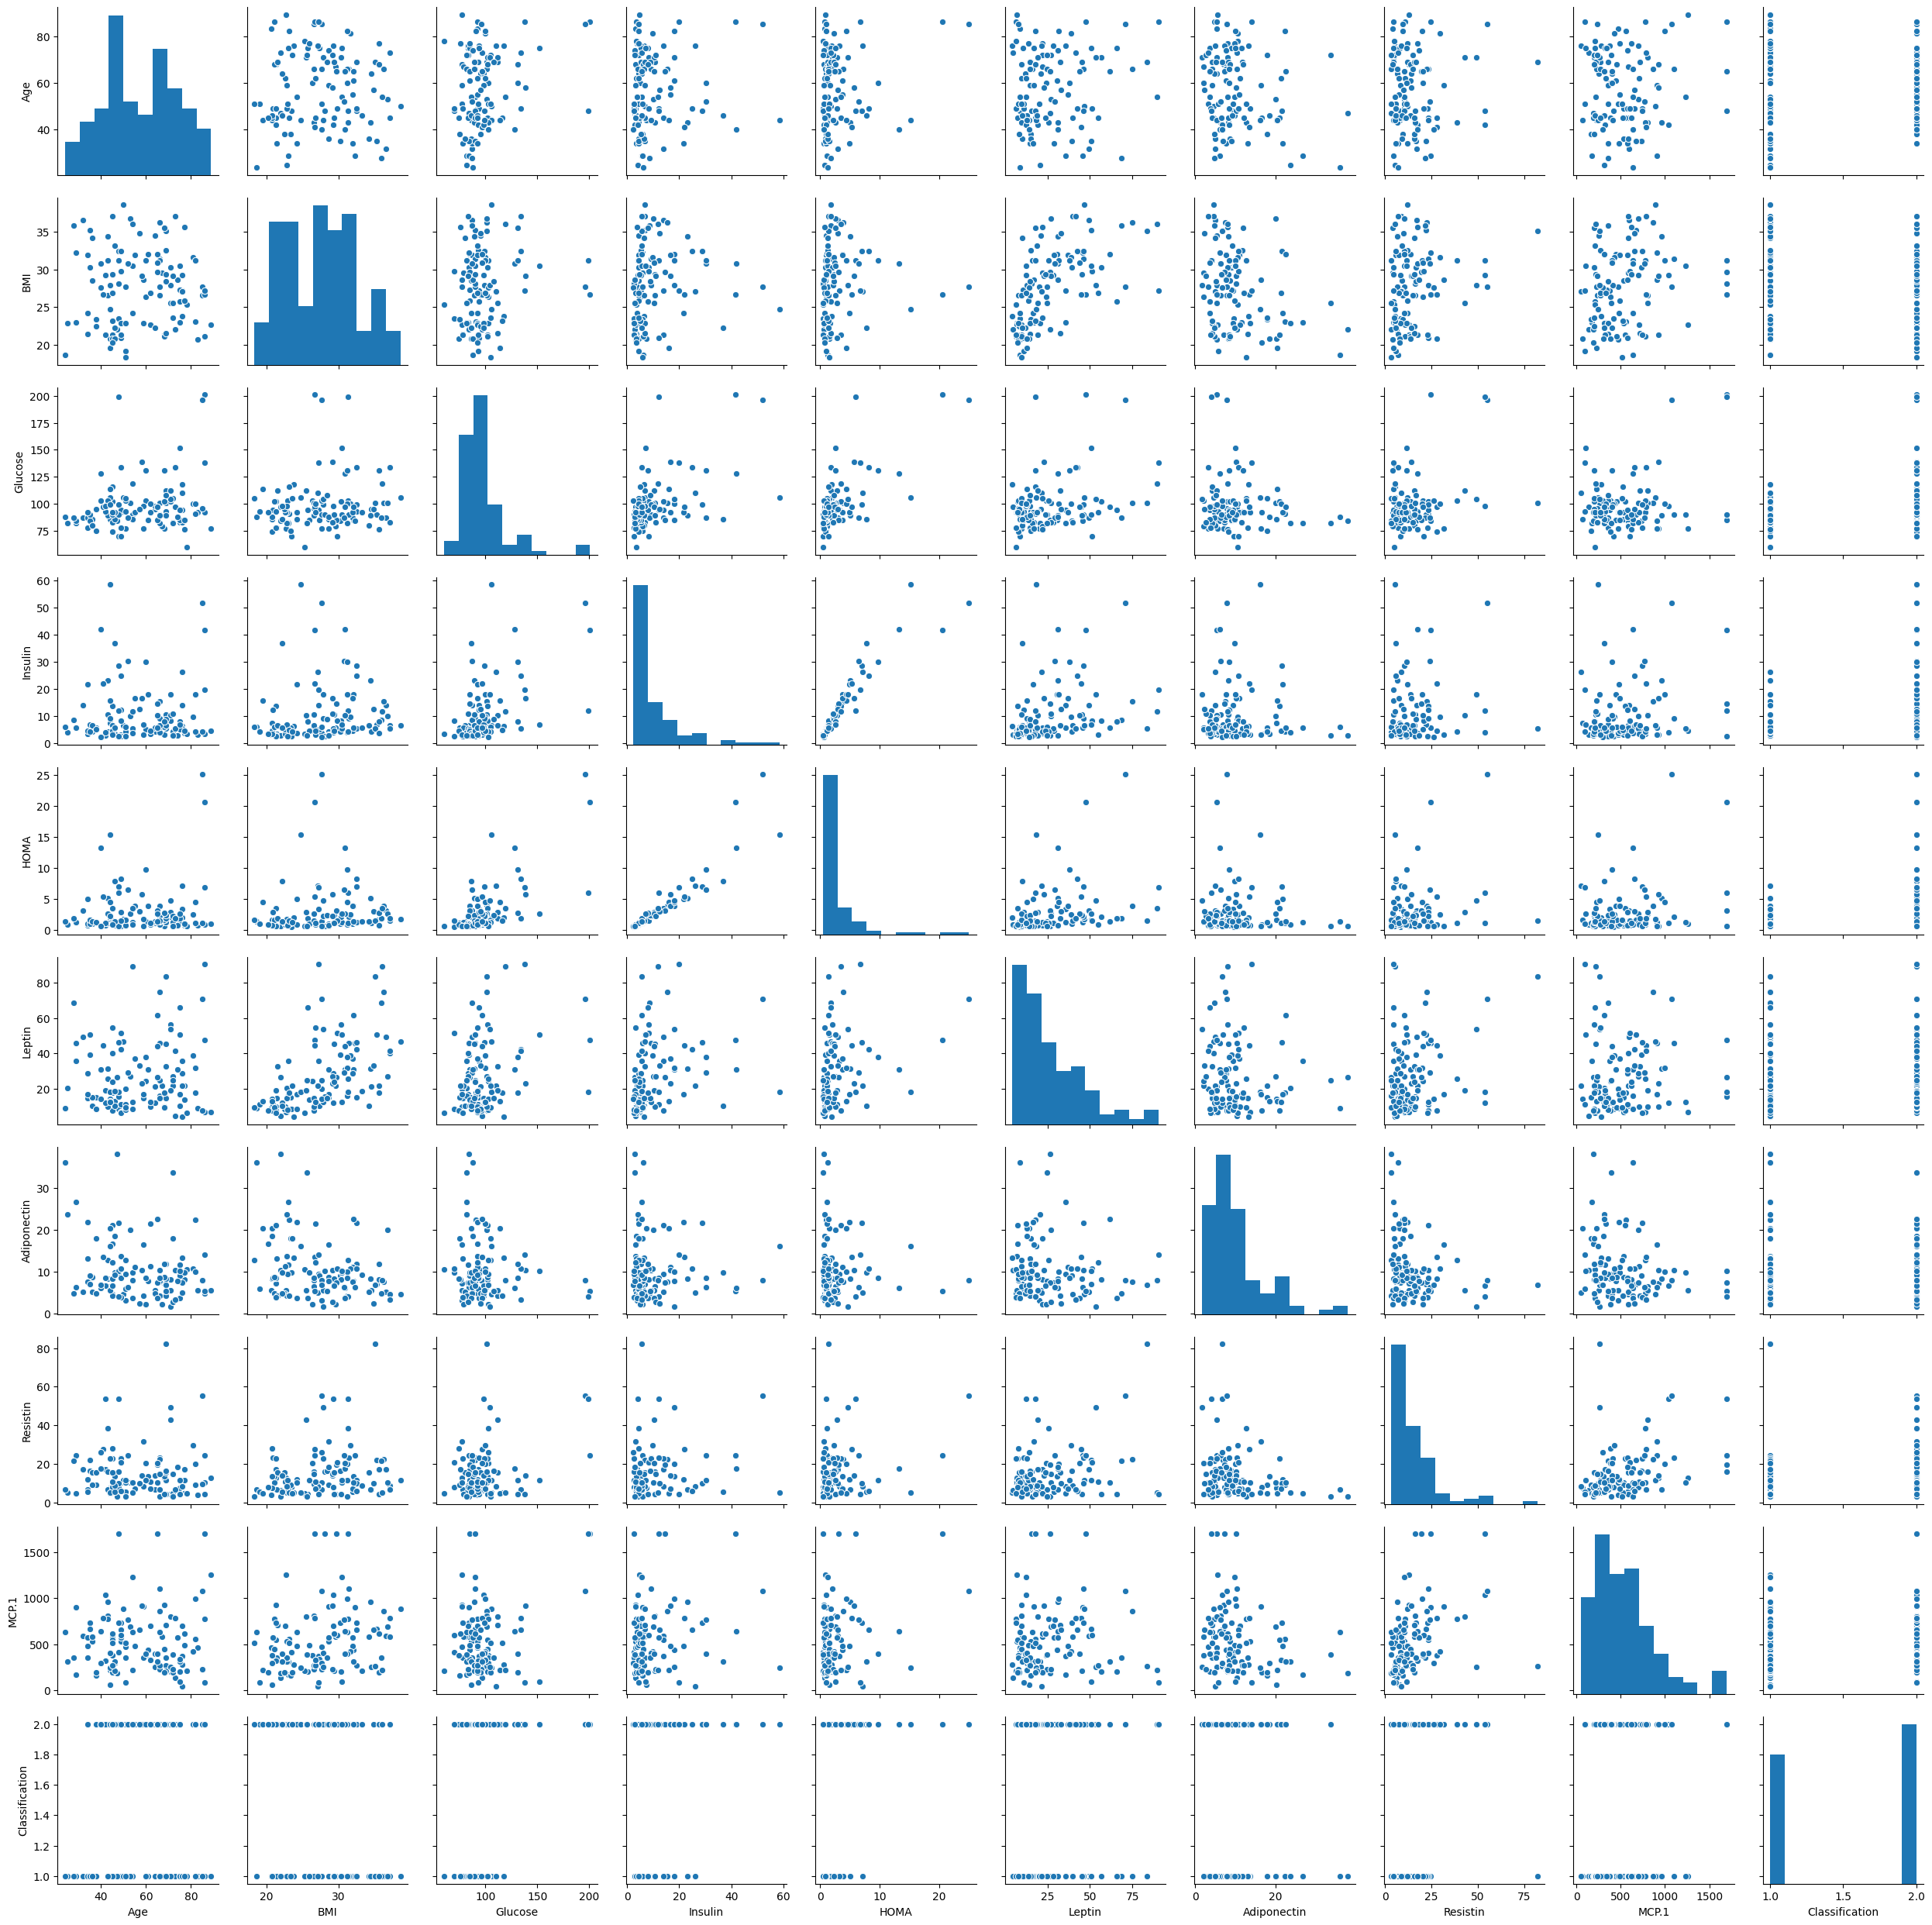

In [8]:
# May need to specify bandwidth (bw) in order to plot, else can delete the `, diag_kws={'bw': 0.2})` code.
sns.pairplot(data)

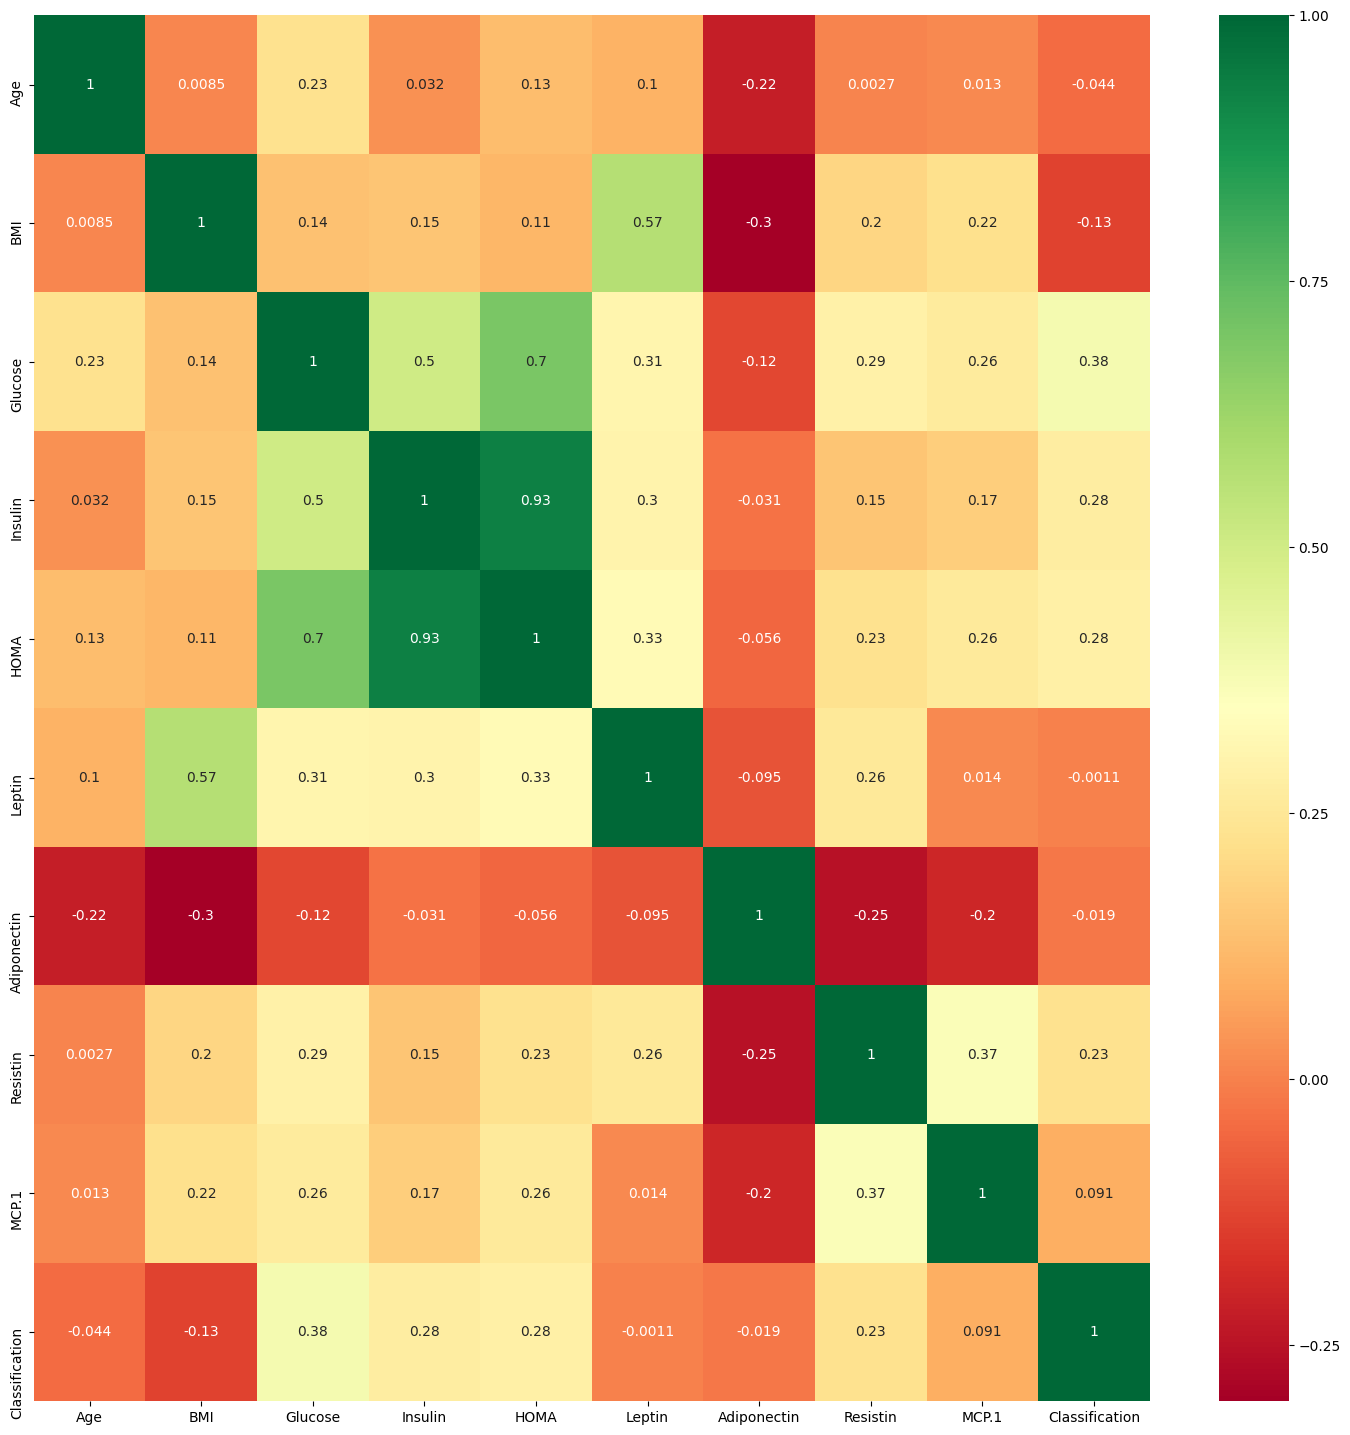

In [9]:
#plot the heatmap diagram wtih the given settings
plt.figure(figsize=(18,18))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

#show the heatmap
plt.show()

In [10]:
#use and fit KMeans clustering
kmeans = KMeans(n_clusters = 4)
kmeansClustering = kmeans.fit_predict(X)

#use and fit agglomerative clustering
aggClustering = AgglomerativeClustering(n_clusters = 4, linkage = 'ward', compute_full_tree = True).fit(X)
aggResults = aggClustering.fit_predict(X)

#use and fit birch clustering
birchClustering = Birch(n_clusters = 4).fit(X)
birchResults = birchClustering.fit_predict(X)

In [11]:
#set the principle component number to two
pca_num_components = 2

#reduce the data columns using PCA
reduced_data = PCA(n_components = pca_num_components).fit_transform(data)

#put the results in a Pandas dataframe
results = pd.DataFrame(reduced_data, columns = ['pca1','pca2'])

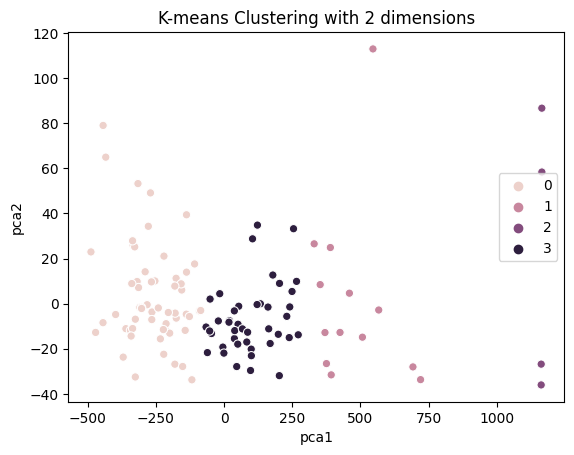

In [12]:
#plot the results of KMeans clustering
sns.scatterplot(x = "pca1", y = "pca2", hue = kmeansClustering, data = results)
plt.title('K-means Clustering on 2 dimensions')
plt.show()

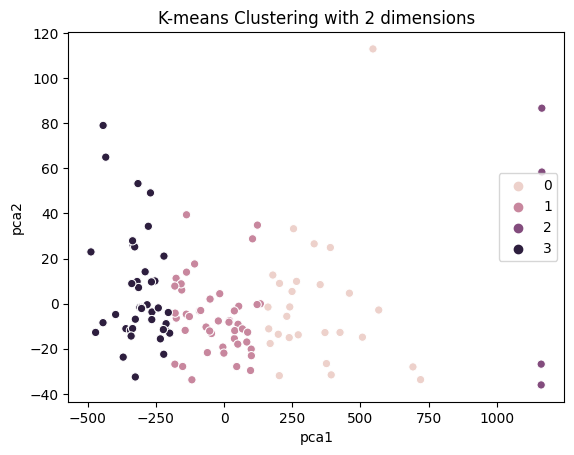

In [13]:
#plot the results of Agglomerative clustering
sns.scatterplot(x = "pca1", y = "pca2", hue = aggResults, data = results)
plt.title('Aggregated Clustering on 2 dimensions')
plt.show()

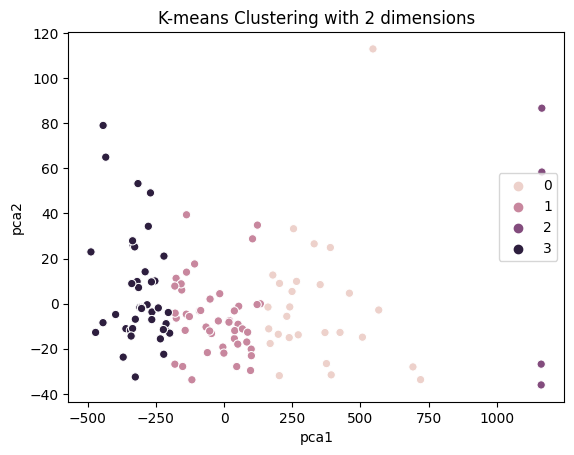

In [14]:
#plot the results of Agglomerative clustering
sns.scatterplot(x = "pca1", y = "pca2", hue = birchResults, data = results)
plt.title('Birch Clustering on 2 dimensions')
plt.show()

In [32]:
#use and fit KMeans clustering
kmeans = KMeans(n_clusters = 4)
kmeansClustering = kmeans.fit_predict(X)

#use and fit agglomerative clustering
aggClustering = AgglomerativeClustering(n_clusters = 4, linkage = 'ward', compute_full_tree = True).fit(X)
aggResults = aggClustering.fit_predict(X)

#use and fit birch clustering
birchClustering = Birch(n_clusters = 4).fit(X)
birchResults = birchClustering.fit_predict(X)

In [33]:
#set the principle component number to two
pca_num_components = 3

#reduce the data columns using PCA
reduced_data = PCA(n_components = pca_num_components).fit_transform(data)

#put the results in a Pandas dataframe
results = pd.DataFrame(reduced_data, columns = ['pca1','pca2', 'pca3'])

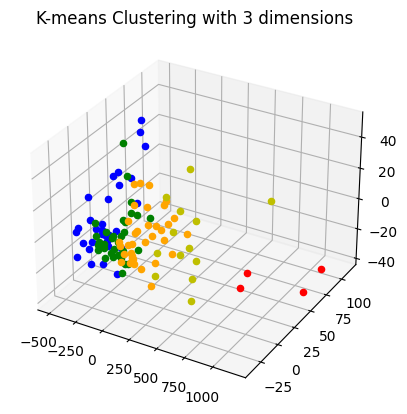

In [39]:
#set the graph
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

#set a colour map
colourmap = ['r', 'b', 'y', 'g', 'orange']

#plot the results of KMeans clustering
for index, element in enumerate(results["pca1"]) :
    ax.scatter(xs = results["pca1"][index], ys = results["pca2"][index], zs = results["pca3"][index],
               c = colourmap[kmeansClustering[index]])
    #END ax.scatter
#END FOR

#set a title for the plot
plt.title('K-means Clustering with 3 dimensions')
plt.show()

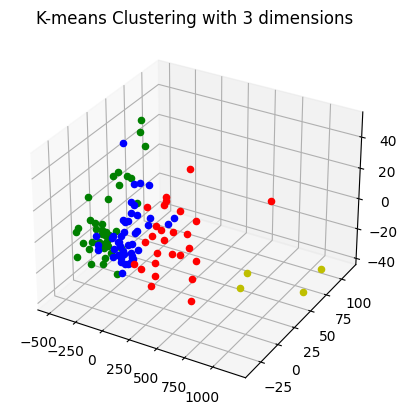

In [40]:
#set the graph
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

#set a colour map
colourmap = ['r', 'b', 'y', 'g', 'orange']

#plot the results of KMeans clustering
for index, element in enumerate(results["pca1"]) :
    ax.scatter(xs = results["pca1"][index], ys = results["pca2"][index], zs = results["pca3"][index],
               c = colourmap[aggResults[index]])
    #END ax.scatter
#END FOR

#set a title for the plot
plt.title('K-means Clustering with 3 dimensions')
plt.show()

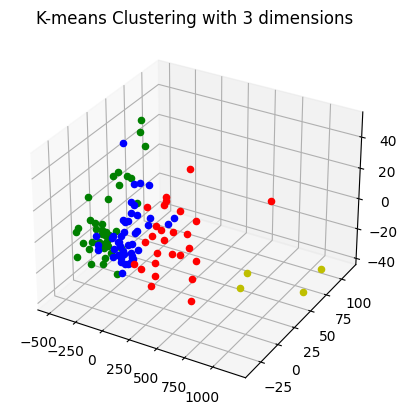

In [41]:
#set the graph
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

#set a colour map
colourmap = ['r', 'b', 'y', 'g', 'orange']

#plot the results of KMeans clustering
for index, element in enumerate(results["pca1"]) :
    ax.scatter(xs = results["pca1"][index], ys = results["pca2"][index], zs = results["pca3"][index],
               c = colourmap[birchResults[index]])
    #END ax.scatter
#END FOR

#set a title for the plot
plt.title('K-means Clustering with 3 dimensions')
plt.show()